First few rows:
                                         customer_id  churn
0  e4b72c1c45b982f8b39f4cab732c433b24d03d52e5a0b1...      1
1  b9996abf8720c9c554b78617f27827c18e597b378227d2...      0
2  18a737f17b32318ed4a99a0a03dbc5d9b60181cf91a3d8...      1
3  183b142d7411500e5336a11f9eeebcf039a425bc8e615a...      0
4  d439419ea17faf98d8974be2b2911c1d7d5eb9949b9fca...      0

Dataset shape: (13001, 2)

Columns: ['customer_id', 'churn']

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13001 entries, 0 to 13000
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  13001 non-null  object
 1   churn        13001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 203.3+ KB
None

Summary statistics:
              churn
count  13001.000000
mean       0.229059
std        0.420244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

Missing values:
cu

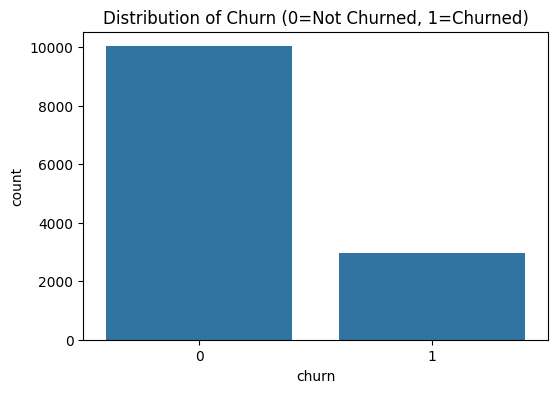


Model Evaluation:
Accuracy: 0.7650903498654363

Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1990
           1       0.00      0.00      0.00       611

    accuracy                           0.77      2601
   macro avg       0.38      0.50      0.43      2601
weighted avg       0.59      0.77      0.66      2601


Confusion Matrix:
[[1990    0]
 [ 611    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ca4d8afaf44949d303.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import gradio as gr

# Load the dataset
df = pd.read_csv('test_cxid.csv')

# Data Exploration
print("First few rows:")
print(df.head())
print("\nDataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

# Check for missing values and duplicates
print("\nMissing values:")
print(df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Visualize the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn (0=Not Churned, 1=Churned)')
plt.show()

# Prepare data for modeling
X = df.drop(['customer_id', 'churn'], axis=1)  # Drop customer_id as it's not a feature
y = df['churn']

# Since there are no other features in this dataset (just customer_id and churn),
# we'll create some dummy features for demonstration purposes
import numpy as np
np.random.seed(42)
X['feature1'] = np.random.normal(0, 1, size=len(X))
X['feature2'] = np.random.randint(0, 5, size=len(X))
X['feature3'] = np.random.uniform(0, 1, size=len(X))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Create a prediction function for Gradio
def predict_churn(feature1, feature2, feature3):
    # Create input array
    input_data = np.array([[feature1, feature2, feature3]])

    # Scale the input
    input_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]  # Probability of churn

    # Return results
    result = "Churn" if prediction == 1 else "Not Churn"
    return f"Prediction: {result} (Probability: {probability:.2f})"

# Create Gradio interface
inputs = [
    gr.Number(label="Feature 1 (Random Normal)"),
    gr.Number(label="Feature 2 (Random Integer 0-4)"),
    gr.Number(label="Feature 3 (Random Uniform 0-1)")
]

output = gr.Textbox(label="Churn Prediction")

# Launch the app
gr.Interface(
    fn=predict_churn,
    inputs=inputs,
    outputs=output,
    title="📞 Customer Churn Predictor",
    description="Predict whether a customer will churn based on their features."
).launch()

In [2]:
!pip install gradio --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00
